<a href="https://colab.research.google.com/github/leminhquoc248/AI_code/blob/main/food_iden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/food_iden/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 289 images belonging to 10 classes.


In [ ]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/food_iden/test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 49 images belonging to 10 classes.


In [ ]:
training_set.class_indices

{'train_banh_tet': 0,
 'train_banh_xeo': 1,
 'train_ca_hap': 2,
 'train_cha_gio': 3,
 'train_ga_luoc': 4,
 'train_hot_vit': 5,
 'train_khoai_mi': 6,
 'train_nam_pia': 7,
 'train_pho': 8,
 'train_tiet_canh': 9}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [ ]:
opt=SGD(lr=0.01,momentum=0.9)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
history=model.fit(training_set,epochs=100,batch_size=10,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)]) # verbose=1 để hiển thị quá trinh học

Epoch 1/100
10/10 [==============================] - 77s 8s/step - loss: 3.3042 - accuracy: 0.1211 - val_loss: 2.3163 - val_accuracy: 0.1224
Epoch 2/100
10/10 [==============================] - 2s 240ms/step - loss: 2.2763 - accuracy: 0.1661 - val_loss: 2.2770 - val_accuracy: 0.1224
Epoch 3/100
10/10 [==============================] - 2s 243ms/step - loss: 2.2897 - accuracy: 0.1592 - val_loss: 2.2465 - val_accuracy: 0.1020
Epoch 4/100
10/10 [==============================] - 2s 244ms/step - loss: 2.2127 - accuracy: 0.1903 - val_loss: 2.3797 - val_accuracy: 0.1020
Epoch 5/100
10/10 [==============================] - 3s 246ms/step - loss: 2.1895 - accuracy: 0.2145 - val_loss: 2.1541 - val_accuracy: 0.1633
Epoch 6/100
10/10 [==============================] - 3s 247ms/step - loss: 2.0816 - accuracy: 0.2111 - val_loss: 2.0322 - val_accuracy: 0.2245
Epoch 7/100
10/10 [==============================] - 2s 244ms/step - loss: 1.9455 - accuracy: 0.2837 - val_loss: 1.8973 - val_accuracy: 0.2653
E

In [ ]:
# Đánh giá độ chính xác của mô hình sau khi đã train 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.6314583420753479
Train Accuracy 0.8200691938400269


<function matplotlib.pyplot.show>

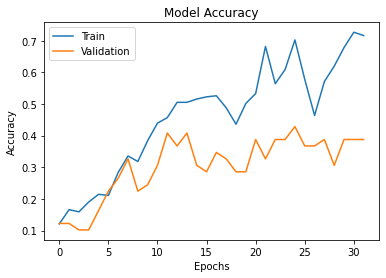

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
# Lưu lại
model.save("Final.h5")
model_CNN=load_model('Final.h5')

ga luoc


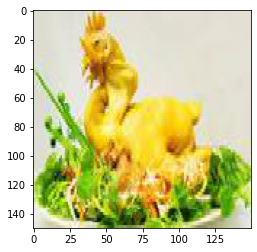

In [ ]:
img=load_img('/content/drive/MyDrive/food_iden/test/test_ga_luoc/tải xuống (7).jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='banh tet'
elif round(result[0][1])==1:
  prediction='banh xeo'
elif round(result[0][2])==1:
  prediction='ca hap'
elif round(result[0][3])==1:
  prediction='cha gio'  
elif round(result[0][4])==1:
  prediction='ga luoc'
elif round(result[0][5])==1:
  prediction='hot vit'
elif round(result[0][6])==1:
  prediction='khoai mi'
elif round(result[0][7])==1:
  prediction='nam pia'
elif round(result[0][8])==1:
  prediction='pho'
elif round(result[0][9])==1:
  prediction='tiet canh'  
print(prediction)

khoai mi


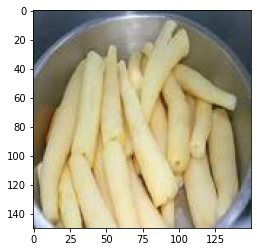

In [ ]:

img=load_img('/content/drive/MyDrive/food_iden/test/test_khoai_mi/tải xuống (26).jpg',target_size=(150,150))
plt.imshow(img)
import numpy as np
img=img_to_array(img)
#img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_CNN.predict(img)
if round(result[0][0])==1:
  prediction='banh tet'
elif round(result[0][1])==1:
  prediction='banh xeo'
elif round(result[0][2])==1:
  prediction='ca hap'
elif round(result[0][3])==1:
  prediction='cha gio'  
elif round(result[0][4])==1:
  prediction='ga luoc'
elif round(result[0][5])==1:
  prediction='hot vit'
elif round(result[0][6])==1:
  prediction='khoai mi'
elif round(result[0][7])==1:
  prediction='nam pia'
elif round(result[0][8])==1:
  prediction='pho'
elif round(result[0][9])==1:
  prediction='tiet canh'  
print(prediction)